In [1]:
import pandas as pd
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
features = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 
            'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [3]:
X = df[features]
y = df['TenYearCHD']

In [4]:
X.fillna(X.mean(), inplace=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_16196\642802493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [5]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=100)

In [6]:
from sklearn.linear_model import LogisticRegression as lr
model = lr()
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [8]:
from sklearn.metrics import classification_report as cr, roc_auc_score as ras
print("Classification Report: \n",cr(y_test, y_pred))
print("AUC-ROC Score:", ras(y_test, y_pred_proba))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.92       712
           1       0.83      0.04      0.07       136

    accuracy                           0.84       848
   macro avg       0.84      0.52      0.49       848
weighted avg       0.84      0.84      0.78       848

AUC-ROC Score: 0.6928391440846001


In [9]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

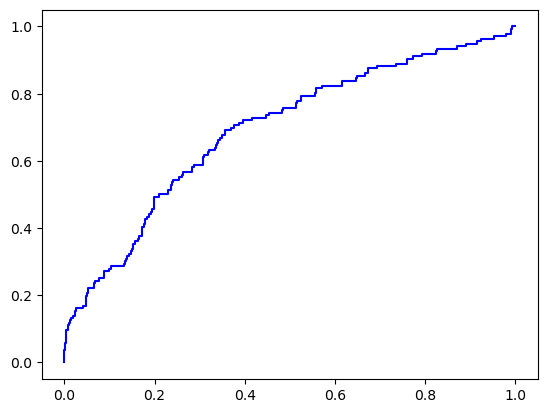

In [10]:
f,t,_ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(f, t)
plt.plot(f, t, color='blue')

<BarContainer object of 15 artists>

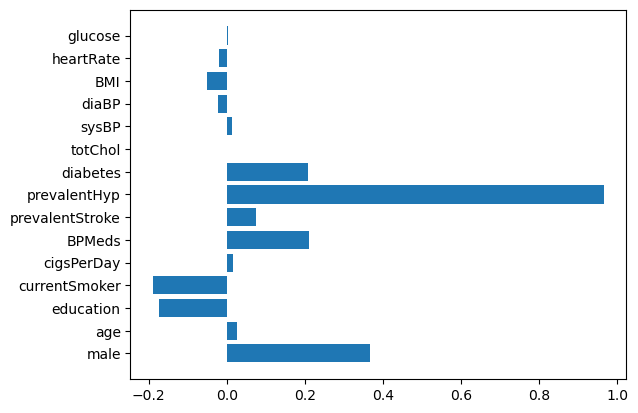

In [11]:
coefficients = model.coef_[0]
plt.barh(features, coefficients)